In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving regression_table.csv to regression_table.csv


In [2]:
df = pd.read_csv("regression_table.csv")

Data preprocessing


In [3]:
df.shape


(1000, 2)

In [4]:
df.describe()

,X,Y
count,1.000000e+03,1000.000000
mean,7.275958e-15,-0.056852
std,2.891085e+01,0.951317
min,-5.000000e+01,-3.565291
25%,-2.500000e+01,-0.682682
50%,3.552714e-15,-0.024003
75%,2.500000e+01,0.572795
max,5.000000e+01,2.788375


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
df.head()

,X,Y
0,-50.0000,-0.433374
1,-49.8999,0.526711
2,-49.7998,-0.632832
3,-49.6997,-0.235546
4,-49.5996,-0.892942


In [7]:
df.tail()

,X,Y
995,49.5996,0.258723
996,49.6997,0.222712
997,49.7998,0.102051
998,49.8999,-0.696911
999,50.0000,0.489715


In [8]:
df.isnull().sum()

,0
X,0
Y,0


No data encoding

<Axes: xlabel='X', ylabel='Y'>

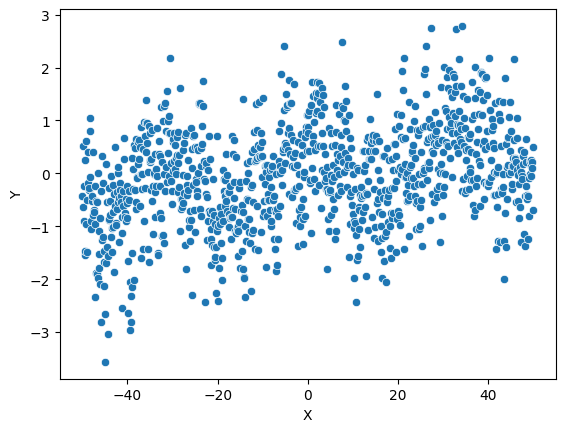

In [12]:
import seaborn as sns
sns.scatterplot(x='X',y='Y',data=df)

<Axes: xlabel='X', ylabel='Count'>

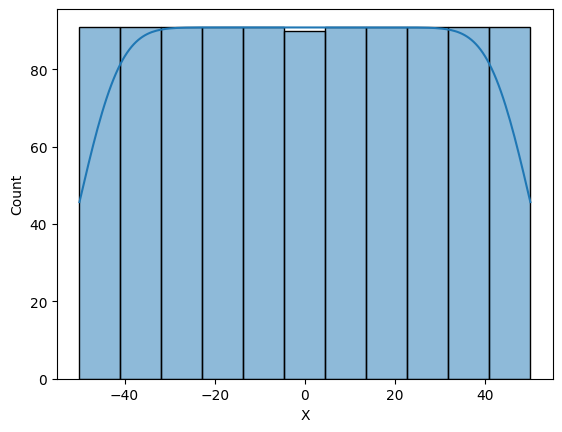

In [14]:
sns.histplot(df['X'],kde=True)

In [15]:
# x, y split
x=df.iloc[:,:-1]
y=df.iloc[:,1]

In [17]:
# train test split
from sklearn.model_selection import train_test_split


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1234)

In [19]:

x_train.shape

(800, 1)

In [20]:

# Model building
from sklearn.linear_model import LinearRegression

In [21]:

lr = LinearRegression()

In [22]:

lr.fit(x_train,y_train)

LinearRegression()

In [23]:
# model Evaluatation
y_predict = lr.predict(x_test)


In [24]:

y_predict

array([ 0.1410709 ,  0.48340492, -0.44167246,  0.23745621, -0.12814324,
       -0.21123402,  0.14882604,  0.00147838,  0.07349039, -0.50371358,
        0.22416168, -0.13922201,  0.37040146, -0.51479235,  0.47454191,
       -0.06499424, -0.58126498, -0.41951492, -0.09712268, -0.56907833,
        0.01366503, -0.04172883,  0.41582442,  0.47564979,  0.44795286,
       -0.12149598,  0.1311    ,  0.13442364,  0.07570615, -0.15251654,
       -0.47823241, -0.45496699,  0.25296649,  0.3393809 , -0.48931118,
       -0.23782307,  0.10118732,  0.0779219 ,  0.33051788,  0.38258811,
       -0.40511252,  0.42579532, -0.47158514,  0.35932269,  0.09010855,
        0.16876783, -0.20458676, -0.08493603,  0.17209146, -0.18575285,
        0.01698866,  0.2618295 ,  0.3637542 , -0.07164151, -0.49374269,
        0.26515313, -0.19018436,  0.35599906, -0.12260385, -0.54692079,
        0.44130559, -0.22896006,  0.01920442, -0.08936754, -0.16359531,
       -0.47601665, -0.01957128,  0.2086514 , -0.42948581, -0.52

In [25]:
y_test

,Y
681,-1.414840
990,-0.084795
155,0.811760
768,1.022127
438,0.130615
...,...
376,0.410261
731,0.423807
594,0.662544
65,-1.031347


In [26]:
error = y_predict - y_test

In [27]:
error

,Y
681,1.555911
990,0.568200
155,-1.253433
768,-0.784671
438,-0.258759
...,...
376,-0.607092
731,-0.227342
594,-0.617859
65,0.489966


In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:

mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)

In [31]:
mse

0.881483365708782

In [30]:
mae

0.7515582491198595

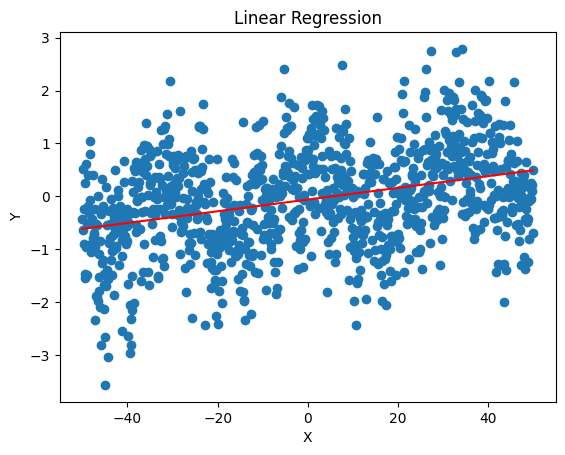

In [41]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x), color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [42]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7) # Tranforming
X_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

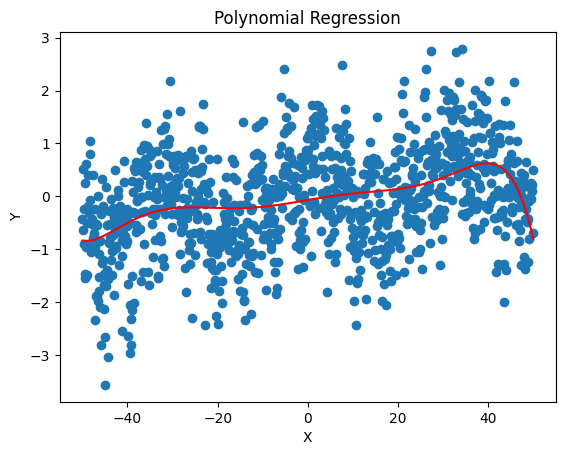

In [43]:

plt.scatter(x,y)
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()